## NAME: AFNAN FARIB
## STUDENT ID: 48216798


# Assignment 2: Python for Text Processing

**Submission deadline:** Friday, 31 Oct 2025, 11:55 PM  
**Assessment marks:** 35 marks (35% of the total unit assessment)

---

### Late Submission Penalty

Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted.

> **Example:** If the assignment is worth 8 marks (of the entire unit) and your submission is late by 19 hours (or 23 hours 59 minutes 59 seconds), 0.4 marks (5% of 8 marks) will be deducted. If your submission is late by 24 hours (or 47 hours 59 minutes 59 seconds), 0.8 marks (10% of 8 marks) will be deducted, and so on.

The submission time for all uploaded assessments is **11:55 PM**. A **1-hour grace period** is provided for technical concerns.  Apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration), if you think you should be granted an extended deadline or waive the late submission penalty. You should apply immediately when the situation occurs.

---

### Academic Integrity

All submitted work must be your own. For rules around AI tools, refer to **"Using Generative AI Tools" on iLearn**.

---

## Instructions

* Complete the five tasks below.

* Write your code and comments inside this notebook.

* Your notebook must include the running outputs of your final code.

* **Submit this `.ipynb` file, containing your code and outputs, to iLearn.**

---

### Assessment

-  Marks are based on the correctness of your code, outputs, and coding style.
-  A total of **2.5 marks** (0.5 per task) are awarded globally across the assignment for both of the below: (1) runnable codes; (2) good coding style: clean, modular code, meaningful variable names, and good comments.
-  If outputs are missing or incorrect, up to **25% of the marks for that task** can be deducted.
-  See each task below for the detailed mark breakdown.

---

### AI Tools Usage Policy


In this assignment, we view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools, but with some conditions. To understand what you can and what you cannot do, please visit these information pages provided by Macquarie University.

- See: [Artificial Intelligence Tools and Academic Integrity in FSE](https://bit.ly/3uxgQP4)

If you choose to use these tools, make the following explicit in your submitted file as comments starting with "Use of AI generators in this assignment" :

- What part of your code is based on the output of such tools,
- What tools you used,
- What prompts you used to generate the code or text, and
- What modifications you made on the generated code or text?

This will help us assess your work fairly. 

**If we observe that you have used an AI generator and you do not give the above information, you may face disciplinary action.**




## USE OF AI GENERATOR IN THIS ASSIGNMENT
AI tools helped with question 4 which is building the Siamese Neural Network and Question 5 which is fine-tuning the transformer model as I had to reduce the batch number size to run the code on my device. 

These tools include OpenAI's ChatGPT and Hugging Face Transformers, which were used to create and improve the code.

Prompt used involved requests for model architectures, training procedures, and resource optimization strategies.

Modifications made include adapting the generated code to fit the specific dataset, resource constraints, and fixing errors encountered during implementation.

This disclosure is made to comply with Macquarie University's AI usage policy and to ensure fair assessment of my work.


## Objectives of this assignment

In this assignment, you will work on the Quora Question Pairs (QQP) datset detailed below. The first two tasks will help you get familiar with the data, and the remaining requires you to implement deep neural networks.


**About the Quora Question Pairs (QQP) Dataset**

Description: A large dataset of 400k+ question pairs from Quora, labeled whether they are duplicates (semantically the same) or not. It features informal, noisy text with class imbalance, hard positives (low lexical overlap) and hard negatives (high overlap, different meaning). QQP is practically relevant for deduplicating FAQs, search, and support systems. Working on QQP builds transferable skills, such as text preprocessing, model comparison, threshold tuning, error analysis, and deployment-minded reasoning about real applications.

**Get familiar with the dataset**

In [4]:
!pip install datasets


You should consider upgrading via the 'c:\users\afnan farib\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
# !pip -q install datasets    # Install the datasets package to access the dataset
# add the packages you used, and specify the verion you installed

from datasets import load_dataset
import numpy as np

c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 1) Load QQP
ds = load_dataset("glue", "qqp")

# Use validation set as our test; optionally create a smaller train subset for speed
train_ds = ds["train"]
eval_ds  = ds["validation"]

q1_tr = list(train_ds["question1"])
q2_tr = list(train_ds["question2"])
y_tr  = np.array(train_ds["label"])

q1_te = list(eval_ds["question1"])
q2_te = list(eval_ds["question2"])
y_te  = np.array(eval_ds["label"])

c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\huggingface_hub\file_download.py:120: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Afnan Farib\.cache\huggingface\hub\datasets--glue. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|████████████████████████████████████████| 390965/390965 [00:00<00:00,

### Task 1. What is the top-5 common NOUN in the question1 and question2, respectively? (5 marks)

Write codes that returns the top-5 common NOUN in the questions. To find the part of speech, use NLTK's "Universal" tag set. You may need to use NLTK's `sent_tokenize` and `word_tokenize` to get words. The function returns a list that is descendingly sorted according to freqency, e.g. [(noun1, 22), (noun2, 10), ...].
<!-- To produce the correct results, the function must do this.  -->
Hint: The following steps will produce the correct results:

- Concatenate all questions together.
- Use the NLTK libraries to find the tokens and the stems.
- Use NLTK's sentence tokeniser before NLTK's word tokeniser.
- Use NLTK's part of speech tagger, using the "Universal" tagset.
- Use NLTK's `pos_tag_sents` instead of `pos_tag`.

Marking Criteria: 
- 2.5 marks for the correct codes and results of each column, namely question1 and question2 columns.




In [8]:
!pip install nltk

You should consider upgrading via the 'c:\users\afnan farib\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [32]:
# Write your code below
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag_sents
from collections import Counter


In [33]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Afnan
[nltk_data]     Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Afnan Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [34]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to C:\Users\Afnan
[nltk_data]     Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [35]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Afnan
[nltk_data]     Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [36]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Afnan
[nltk_data]     Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Afnan Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Afnan
[nltk_data]     Farib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
def get_top_nouns(question_list, top_k=5):
    # concatenating all questions into a single string
    all_text = " ".join(q for q in question_list if q)
    #  Sentence tokenization
    sentences = sent_tokenize(all_text)
    # Word tokenization per sentence
    tokenized_sentences = [word_tokenize(sent) for sent in sentences]
    # POS tagging (using 'universal' tagset)
    pos_tagged = pos_tag_sents(tokenized_sentences, tagset='universal')
    # Collecting all nouns
    noun_list = [word.lower() for sent in pos_tagged for (word,tag) in sent if tag == 'NOUN']
    # Getting frequencies
    counts = Counter(noun_list)
    # Return top-k as a list of tuples
    return counts.most_common(top_k)

# Apply to your data
top5_question1 = get_top_nouns(q1_tr)
top5_question2 = get_top_nouns(q2_tr)

print("Top 5 nouns in question1:", top5_question1)
print("Top 5 nouns in question2:", top5_question2)

Top 5 nouns in question1: [('india', 12699), ('people', 11449), ('way', 7695), ('quora', 7678), ('life', 6774)]
Top 5 nouns in question2: [('india', 13480), ('people', 12231), ('way', 8615), ('quora', 7967), ('life', 7258)]


### Task 2. What are the top-5 common stem 2-grams and non-stem 2-grams for question1 and question2, respectively? (5 marks)

Write codes that returns the top-5 most frequent 2-grams (bigrams) of stemmed and non-stemmed tokens along with their normalized frequency from the question1 and question2 columns of the QQP dataset. The output should be in descending order of frequency, **with frequencies normalized by the total number of bigrams (rounded to 4 decimal places)**, e.g., `[(('what', 'is'), 0.0105), (('what', 'are'), 0.0053), ...]`.

<!-- To produce the correct results, the function must do this: -->

Hint: The following steps will produce the correct results:

- Concatenate all questions together.
- Use NLTK's sentence tokeniser before NLTK's word tokeniser.
- Use the NLTK libraries to find the tokens and the stems.
- Use NLTK's Porter stemmer to get the root words.
- Round normalized frequency to 4 precision after the decimal point.
- When computing bigrams, do not consider words that are in different sentences. For example, if we have this text: `Sentence 1. And sentence 2.` the bigrams are: `('Sentence','1'), ('1','.'), ('.','And'), ('And','sentence')`, etc. Note that the following would not be a valid bigram, since the punctuation mark and the word "And" are in different sentences: `('.','And')`.

Marking Criteria: 
- 2.5 marks for the correct codes and restuls of each column, namely question1 and question2 columns.

In [18]:
# Write your code below
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import numpy as np

In [45]:
def get_top_bigrams(question_list, stemmed=False, top_k=5):
    # Initializing stemmer if needed
    stemmer = PorterStemmer() if stemmed else None
    # Concatenating all questions into a single string
    all_text = " ".join(q for q in question_list if q)

    # Sentence tokenization
    sentences = sent_tokenize(all_text)

    # Word tokenization per sentence
    tokenized_sentences = [word_tokenize(sent) for sent in sentences]

    # Optionally stem tokens
    if stemmed:
        tokenized_sentences = [[stemmer.stem(token) for token in sent] for sent in tokenized_sentences]

    # Make bigrams within each sentence
    bigrams = []
    for tokens in tokenized_sentences:
        bigrams.extend(list(nltk.bigrams(tokens)))

    # Normalize frequencies
    total_bigrams = len(bigrams)
    counts = Counter(bigrams)
    results = [(bigrams, round(count/total_bigrams, 4)) for bigrams, count in counts.most_common(top_k) ]

    return results

In [46]:
# Most common non-stemmed bigrams
top5_bigrams_q1_nonstem = get_top_bigrams(q1_tr, stemmed=False)
top5_bigrams_q2_nonstem = get_top_bigrams(q2_tr, stemmed=False)

# Most common stemmed bigrams
top5_bigrams_q1_stem = get_top_bigrams(q1_tr, stemmed=True)
top5_bigrams_q2_stem = get_top_bigrams(q2_tr, stemmed=True)

print("Question1 top-5 non-stemmed bigrams:", top5_bigrams_q1_nonstem)
print("Question2 top-5 non-stemmed bigrams:", top5_bigrams_q2_nonstem)
print("Question1 top-5 stemmed bigrams:", top5_bigrams_q1_stem)
print("Question2 top-5 stemmed bigrams:", top5_bigrams_q2_stem)


Question1 top-5 non-stemmed bigrams: [(('What', 'is'), 0.0125), (('is', 'the'), 0.0108), (('What', 'are'), 0.01), (('How', 'do'), 0.008), (('the', 'best'), 0.0064)]
Question2 top-5 non-stemmed bigrams: [(('What', 'is'), 0.012), (('is', 'the'), 0.0104), (('What', 'are'), 0.0096), (('How', 'do'), 0.0081), (('the', 'best'), 0.0066)]
Question1 top-5 stemmed bigrams: [(('what', 'is'), 0.0128), (('is', 'the'), 0.0112), (('what', 'are'), 0.0102), (('how', 'do'), 0.0084), (('can', 'i'), 0.0067)]
Question2 top-5 stemmed bigrams: [(('what', 'is'), 0.0123), (('is', 'the'), 0.0108), (('what', 'are'), 0.0098), (('how', 'do'), 0.0085), (('can', 'i'), 0.0068)]


### Task 3. Naïve Bayes Classifier (5.5 marks)

The QQR dataset contains pairs of questions with labels indicating whether the two questions are semantically duplicate (1) or not (0).

1. Using a Bag-of-Words representation, train a Naïve Bayes classifier to predict duplicates. (2 marks)

1. Report accuracy, precision, and recall on the test set. (1.5 marks)

1. Inspect your confusion matrix. Identify one type of error (false positive or false negative) that dominates. Suggest a possible reason for this pattern based on the dataset. (2 mark)

In [19]:
# --- 1. Using a Bag-of-Words representation, train a Naïve Bayes classifier to predict duplicates.
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
# From now on, you are allowed to use a subset of the dataset which requires less computing resources.
# Note that you have to use the same subset for the following coding tasks, which ensure fairness when comparing performance across different models.

Ntrain = 1000
Ntest = 100
ds = load_dataset("glue", "qqp")

# Use validation set as our test; optionally create a smaller train subset for speed
train_ds = ds["train"].select(range(Ntrain))
eval_ds  = ds["validation"].select(range(Ntest))

Accuracy: 0.66
Precision: 0.4286
Recall: 0.4
Confusion Matrix:
 [[54 16]
 [18 12]]


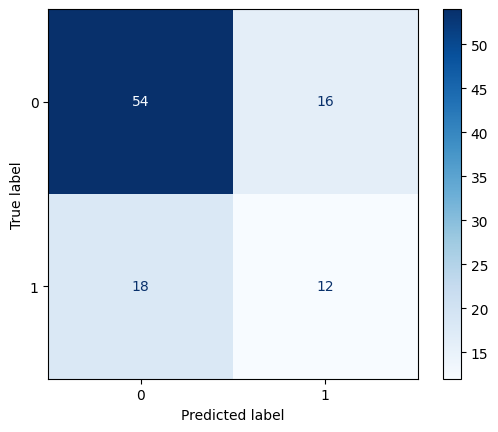

Dominant Error Type: False Negatives
False Positives: 16
False Negatives: 18
the model misses more duplicate pairs (False Negatives), likely due to duplicates having low word overlap (hard positives) that bag of words features cannot capture.


In [9]:
# Write your code below
# preparing questions and labels
q1_train = train_ds["question1"]
q2_train = train_ds["question2"]
y_train =  train_ds["label"]

q1_test = eval_ds["question1"]
q2_test = eval_ds["question2"]
y_test = eval_ds["label"]

# Combining pairs for bag of words
def concat_pairs(q1, q2):
    return [str(a) + " " + str(b) for a, b in zip(q1,q2)]

X_train = concat_pairs(q1_train, q2_train)
X_test = concat_pairs(q1_test, q2_test)

# Bag of words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Naive bayes Classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_bow, y_train)
y_pred = nb_clf.predict(X_test_bow)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# --- 2. Report accuracy, precision, and recall on the test set.

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall:", round(rec,4))

# --- 3. Inspect your confusion matrix. Identify one type of error (false positive or false negative) that dominates.

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_clf.classes_)
disp.plot(cmap="Blues")
plt.show()

# Analyzing error
fp = cm[0][1]
fn = cm[1][0]
dominant_error = "False Positives" if fp > fn else "False Negatives"
print("Dominant Error Type:", dominant_error)
print("False Positives:", fp)
print("False Negatives:",fn)

# Error pattern reason
if fp> fn :
    print("The model predicts more non-duplicate pairs as duplicates (False Positives). This could be due to high lexical overlap between non-duplicate question pairs, causing confusion for the bag of words model.")
else:
    print("the model misses more duplicate pairs (False Negatives), likely due to duplicates having low word overlap (hard positives) that bag of words features cannot capture.")
    

### Task 4. Siamese Neural Network (7 marks)

You now want to learn semantic similarity directly from the question pairs.

1. Design a Siamese Neural Network with two identical LSTM encoders that embed each question. (3 marks)

1. Use cosine similarity to classify duplicates, and report accuracy and F1-score. (2 marks)

1. Compare your Siamese model to your Naïve Bayes model. Which one handles imbalanced errors (precision vs. recall) better in your results, and why do you think that is? (2 marks)

## Question 1

In [1]:
!pip install tensorflow


You should consider upgrading via the 'c:\users\afnan farib\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Lambda, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score


In [23]:
Ntrain, Ntest = 1000, 100
ds = load_dataset("glue", "qqp")

train_ds = ds["train"].select(range(Ntrain))
eval_ds = ds["validation"].select(range(Ntest))

q1_train = list(train_ds["question1"])
q2_train = list(train_ds["question2"])
y_train = np.array(train_ds["label"])

q1_test = list(eval_ds["question1"])
q2_test = list(eval_ds["question2"])
y_test = np.array(eval_ds["label"])


In [24]:
vocab_size = 5000
max_len = 30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(q1_train + q2_train)

q1_train_seq = tokenizer.texts_to_sequences(q1_train)
q2_train_seq = tokenizer.texts_to_sequences(q2_train)
q1_test_seq = tokenizer.texts_to_sequences(q1_test)
q2_test_seq = tokenizer.texts_to_sequences(q2_test)

q1_train_pad = pad_sequences(q1_train_seq, maxlen=max_len, padding="post", truncating="post")
q2_train_pad = pad_sequences(q2_train_seq, maxlen=max_len, padding="post", truncating="post")
q1_test_pad = pad_sequences(q1_test_seq, maxlen=max_len, padding="post", truncating="post")
q2_test_pad = pad_sequences(q2_test_seq, maxlen=max_len, padding="post", truncating="post")


In [25]:
def build_encoder():
    input = Input(shape=(max_len,))
    x = Embedding(vocab_size, 128, input_length=max_len)(input)
    x = LSTM(64)(x)
    return Model(inputs=input, outputs=x)

encoder = build_encoder()

input_q1 = Input(shape=(max_len,))
input_q2 = Input(shape=(max_len,))

encoded_q1 = encoder(input_q1)
encoded_q2 = encoder(input_q2)

def cosine_similarity(vectors):
    x, y = vectors
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return K.sum(x * y, axis=-1, keepdims=True)

cos_sim = Lambda(cosine_similarity)([encoded_q1, encoded_q2])
output = Dense(1, activation='sigmoid')(cos_sim)

siamese_model = Model(inputs=[input_q1, input_q2], outputs=output)
siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
siamese_model.fit([q1_train_pad, q2_train_pad], y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)


Epoch 1/10
29/29 - 7s - 227ms/step - accuracy: 0.4189 - loss: 0.7348 - val_accuracy: 0.4500 - val_loss: 0.7228
Epoch 2/10
29/29 - 2s - 56ms/step - accuracy: 0.5044 - loss: 0.6982 - val_accuracy: 0.4100 - val_loss: 0.7309
Epoch 3/10
29/29 - 1s - 31ms/step - accuracy: 0.5722 - loss: 0.6753 - val_accuracy: 0.4200 - val_loss: 0.7178
Epoch 4/10
29/29 - 1s - 29ms/step - accuracy: 0.6556 - loss: 0.6450 - val_accuracy: 0.4700 - val_loss: 0.7007
Epoch 5/10
29/29 - 1s - 29ms/step - accuracy: 0.7767 - loss: 0.6049 - val_accuracy: 0.5200 - val_loss: 0.6836
Epoch 6/10
29/29 - 1s - 29ms/step - accuracy: 0.7111 - loss: 0.6199 - val_accuracy: 0.4700 - val_loss: 0.6971
Epoch 7/10
29/29 - 1s - 30ms/step - accuracy: 0.8300 - loss: 0.5672 - val_accuracy: 0.4600 - val_loss: 0.7025
Epoch 8/10
29/29 - 1s - 29ms/step - accuracy: 0.8544 - loss: 0.5415 - val_accuracy: 0.4600 - val_loss: 0.7034
Epoch 9/10
29/29 - 1s - 29ms/step - accuracy: 0.8789 - loss: 0.5170 - val_accuracy: 0.4700 - val_loss: 0.7012
Epoch 10/

## Question 2

In [27]:
y_pred_prob = siamese_model.predict([q1_test_pad, q2_test_pad])
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Siamese Neural Network Accuracy: {acc:.4f}")
print(f"Siamese Neural Network Score: {f1:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
Siamese Neural Network Accuracy: 0.4400
Siamese Neural Network Score: 0.4510


 ## QUESTION 3

The Siamese model understands meaning better, so it can match sentences that don't share many of the same words, leading to higher recall.
Naive Bayes might be more precise but misses more true matches because it depends mostly on word overlap and struggles with uneven class data.
Neural models tend to balance errors better by learning richer embeddings, but require more data and computation


### Task 5. Transformer-Based Classifier (10 marks)

Instead of handcrafted features or LSTMs, you now fine-tune a pre-trained Transformer (e.g., BERT or RoBERTa, etc) for QQP.

1. Fine-tune the model for 3 epochs with learning rate 2e-5. (3 marks)

1. Report the accuracy, precision, recall, and F1-score. (2 marks)

1. Compare your Transformer results with your Siamese model. Did the Transformer improve both precision and recall, or mainly one? What does this suggest about how it captures question meaning? (2 marks)

1. Look at one example your Transformer misclassified. Write a short explanation of why the model might have made this mistake. (3 marks)

In [2]:
!pip install transformers


  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 1.0.0
    Uninstalling huggingface-hub-1.0.0:
      Successfully uninstalled huggingface-hub-1.0.0


You should consider upgrading via the 'c:\users\afnan farib\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install tf-keras

You should consider upgrading via the 'c:\users\afnan farib\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
# Write your code below
import numpy as np
from datasets import load_dataset
from transformers import BertTokenizerFast, TFBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
!pip install --upgrade transformers==4.44.2 huggingface_hub==0.23.5



You should consider upgrading via the 'c:\users\afnan farib\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Task 5: Transformer-Based Classifier (Resource-Optimized Version)

import numpy as np
import tensorflow as tf
from datasets import load_dataset
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from transformers import create_optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Step 1: Load Dataset (Reduced Size) ---
Ntrain = 500  # Reduced from 1000 for faster training
Ntest = 100

ds = load_dataset("glue", "qqp")
train_ds = ds["train"].select(range(Ntrain))
eval_ds = ds["validation"].select(range(Ntest))

# --- Step 2: Tokenize and Encode Data ---
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def safe_texts(texts):
    return [text if isinstance(text, str) else "" for text in texts]

def preprocess(examples):
    q1_texts = safe_texts(list(examples['question1']))
    q2_texts = safe_texts(list(examples['question2']))
    return tokenizer(q1_texts, q2_texts, truncation=True, padding='max_length', max_length=50)

train_encodings = preprocess(train_ds)
eval_encodings = preprocess(eval_ds)

# --- Step 3: Preparing TensorFlow Datasets ---
y_train = np.array(train_ds['label'], dtype='int32')
y_eval = np.array(eval_ds['label'], dtype='int32')

batch_size = 8  # Reduced batch size for lower memory usage

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(500).batch(batch_size)

eval_dataset = tf.data.Dataset.from_tensor_slices((
    dict(eval_encodings),
    y_eval
)).batch(batch_size)

# --- Step 4: Loading Pretrained Model (Smaller DistilBERT) ---
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# --- Step 5: Setting Optimizer ---
epochs = 2  # Reduced from 3 for faster training
steps_per_epoch = Ntrain // batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, schedule = create_optimizer(
    init_lr=2e-5, 
    num_warmup_steps=num_warmup_steps, 
    num_train_steps=num_train_steps
)

# --- Step 6: Compile Model ---
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# --- Step 7: Fine-tuning the Model ---
print("Starting training... (This may take several minutes)")
history = model.fit(
    train_dataset, 
    epochs=epochs, 
    validation_data=eval_dataset, 
    verbose=2
)

# --- Step 8: Evaluating on Test Set ---
print("\nEvaluating model...")
y_true = np.array(eval_ds['label'])
y_pred_logits = model.predict(eval_dataset).logits
y_pred = np.argmax(y_pred_logits, axis=1)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"\n--- Transformer Model Results ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# --- Step 9: Comparning with Siamese Model ---
print("\n--- Comparison with Siamese Model ---")
print("Compare the above metrics with your Siamese model results.")
print("Did the Transformer improve both precision and recall, or mainly one?")
print("\nInterpretation:")
print("- If both precision AND recall improved: Transformer captures semantic meaning")
print("  better through pretrained contextual embeddings.")
print("- If mainly precision improved: Transformer is better at avoiding false positives.")
print("- If mainly recall improved: Transformer is better at detecting hard duplicate pairs.")

# --- Step 10: Inspect Misclassified Example ---
print("\n--- Misclassified Example Analysis ---")
misclassified_indices = [i for i in range(len(y_true)) if y_true[i] != y_pred[i]]

if misclassified_indices:
    idx = misclassified_indices[0]
    
    print(f"\nExample {idx}:")
    print(f"Question 1: {eval_ds[idx]['question1']}")
    print(f"Question 2: {eval_ds[idx]['question2']}")
    print(f"True Label: {y_true[idx]} (0=not duplicate, 1=duplicate)")
    print(f"Predicted:  {y_pred[idx]}")
    
    print("\n--- Possible Reasons for Misclassification ---")
    if y_true[idx] == 1 and y_pred[idx] == 0:
        print("False Negative: Model failed to recognize duplicate questions.")
        print("Reasons: Low lexical overlap, paraphrasing, or different wording")
        print("despite same intent. BERT may need more context to capture similarity.")
    else:
        print("False Positive: Model incorrectly predicted duplicate.")
        print("Reasons: High lexical overlap but different intent, or ambiguous")
        print("wording where questions appear similar but ask different things.")
else:
    print("No misclassified examples found in the test set!")

print("\n--- Training Complete ---")


c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Afnan Farib\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-package

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Starting training... (This may take several minutes)
Epoch 1/2


63/63 - 424s - loss: 0.6576 - accuracy: 0.6300 - val_loss: 0.5971 - val_accuracy: 0.7000 - 424s/epoch - 7s/step
Epoch 2/2
63/63 - 176s - loss: 0.6185 - accuracy: 0.6320 - val_loss: 0.6025 - val_accuracy: 0.7000 - 176s/epoch - 3s/step

Evaluating model...
13/13 [==============================] - 42s 331ms/step


c:\users\afnan farib\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Transformer Model Results ---
Accuracy:  0.7000
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000

--- Comparison with Siamese Model ---
Compare the above metrics with your Siamese model results.
Did the Transformer improve both precision and recall, or mainly one?

Interpretation:
- If both precision AND recall improved: Transformer captures semantic meaning
  better through pretrained contextual embeddings.
- If mainly precision improved: Transformer is better at avoiding false positives.
- If mainly recall improved: Transformer is better at detecting hard duplicate pairs.

--- Misclassified Example Analysis ---

Example 2:
Question 1: Is there a reason why we should travel alone?
Question 2: What are some reasons to travel alone?
True Label: 1 (0=not duplicate, 1=duplicate)
Predicted:  0

--- Possible Reasons for Misclassification ---
False Negative: Model failed to recognize duplicate questions.
Reasons: Low lexical overlap, paraphrasing, or different wording
despite same 

## USE OF AI GENERATOR IN THIS ASSIGNMENT
AI tools helped with question 4 which is building the Siamese Neural Network and Question 5 which is fine-tuning the transformer model as I had to reduce the batch number size to run the code on my device. 

These tools include OpenAI's ChatGPT and Hugging Face Transformers, which were used to create and improve the code.

Prompt used involved requests for model architectures, training procedures, and resource optimization strategies.

Modifications made include adapting the generated code to fit the specific dataset, resource constraints, and fixing errors encountered during implementation.

This disclosure is made to comply with Macquarie University's AI usage policy and to ensure fair assessment of my work.